16.656614376003876 hectopascal -91.63594657677542 degree_Celsius


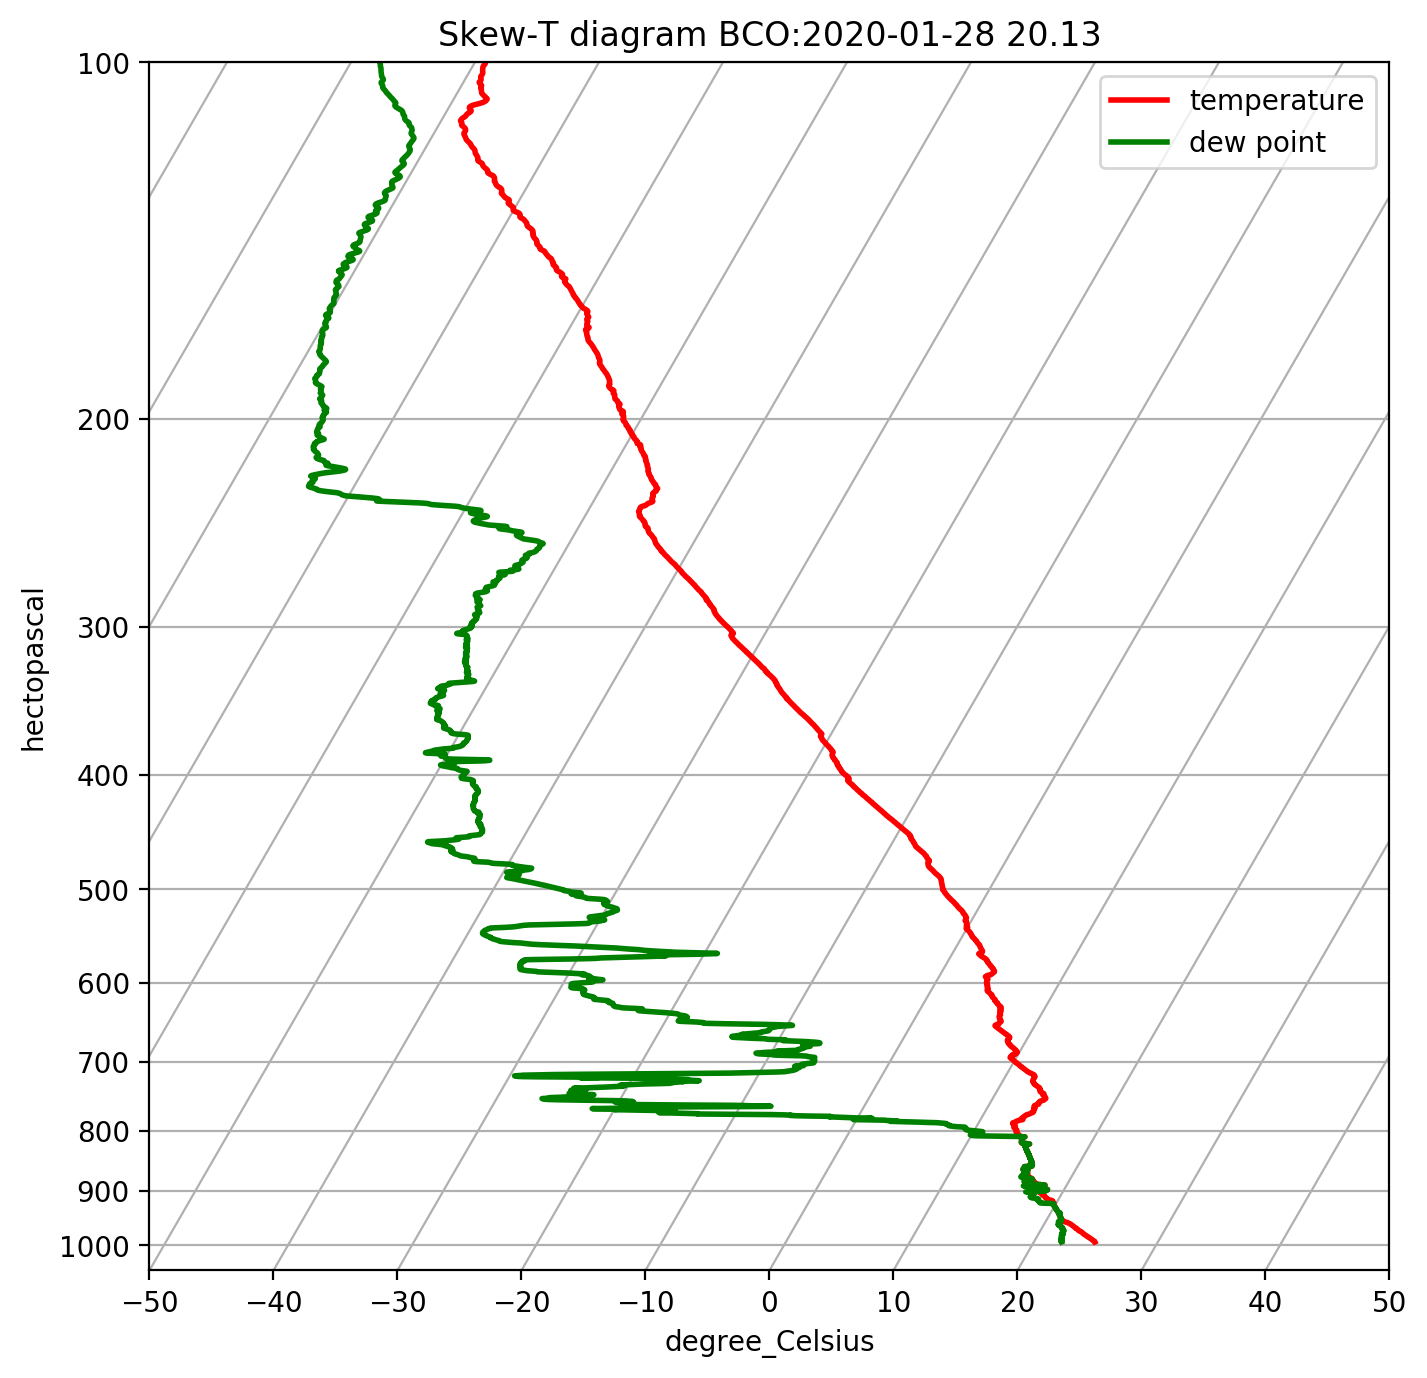

In [87]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units
my_example_nc_file = 'BCO_SoundingDescentProfile_DeeblesPointBarbadosWestIndies_20200128_2013.nc'
fh = Dataset(my_example_nc_file, mode='r')
#print(fh.variables.keys())
Te = fh.variables['temperature'][:]
Pr = fh.variables['pressure'][:]
TD = fh.variables['dewPoint'][:]
wid_speed = fh.variables['windSpeed'][:]
wid_dir = fh.variables['windDirection'][:]
P = pd.DataFrame(Pr.T)
Td= pd.DataFrame(TD.T)
T = pd.DataFrame(Te.T)
wind_speed = pd.DataFrame(wid_speed.T)
wind_dir = pd.DataFrame(wid_dir.T)
df = pd.concat([P,T,Td,wind_speed,wind_dir],axis = 1)
#df.drop(df.columns[[1]],axis=1,inplace=True)
df.drop(df.index[:1], inplace=True)
df.columns = ['pressure','temperature','dewpoint','speed','direction']
p = df['pressure'].values * units.hPa
t = df['temperature'].values * units.degC
td = df['dewpoint'].values * units.degC
wnd_spd = df['speed'].values * units.knots
wnd_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wnd_spd, wnd_dir)
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], t[0], td[0])
print(lcl_pressure, lcl_temperature)
# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(8, 8),dpi=200)
skew = SkewT(fig)
# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
plt.title('Skew-T diagram BCO:2020-01-28 20.13')
skew.plot(p, t, 'r', linewidth=2,label = 'temperature')
skew.plot(p, td, 'g', linewidth=2,label='dew point')
plt.legend()
plt.xlim([-50,50])
#skew.plot_barbs(p, u, v)
# Show the plot
plt.show()


In [92]:
#lons = fh.variables['longitude'][:]
#lats = fh.variables['latitude'][:]
hmd = fh.variables['humidity'][:]
hmd

masked_array(data=[[1.9635084867477417, 1.984110951423645,
                    2.0005581378936768, 2.0241379737854004,
                    2.047081232070923, 2.0684800148010254,
                    2.0919547080993652, 2.1176116466522217,
                    2.138150215148926, 2.160940647125244,
                    2.181300401687622, 2.197204351425171,
                    2.2113444805145264, 2.2255454063415527,
                    2.2387020587921143, 2.245866298675537,
                    2.251840353012085, 2.2527921199798584,
                    2.2526559829711914, 2.2495334148406982,
                    2.243441581726074, 2.234409809112549,
                    2.221538782119751, 2.208754777908325,
                    2.192222833633423, 2.175828218460083,
                    2.1595699787139893, 2.143446445465088,
                    2.1274566650390625, 2.1246531009674072,
                    2.106041669845581, 2.0903608798980713,
                    2.0748097896575928, 2.05938720703125

In [12]:

#df['temperature']=df.loc[:,'temperature']+273
#df.to_csv('BCO_SoundingDescentProfile_DeeblesPointBarbadosWestIndies_20200126_1202.txt', sep = ' ', header=None, index=None)

,pressure,temperature,dewpoint,speed,direction
1,29.730000,-57.790001,-87.839996,5.9,39.0
2,29.780001,-57.840000,-87.879997,5.9,37.0
3,29.840000,-57.900002,-87.930000,6.0,36.0
4,29.910000,-57.950001,-87.970001,6.0,34.0
5,29.990000,-58.000000,-88.000000,6.1,32.0
...,...,...,...,...,...
5089,984.869995,23.719999,20.309999,5.7,124.0
5090,985.320007,23.740000,20.299999,5.7,124.0
5091,985.539978,23.770000,20.320000,5.7,124.0
5092,985.880005,23.809999,20.330000,5.7,123.0


16.514296759441084 hectopascal -91.08192696136425 degree_Celsius


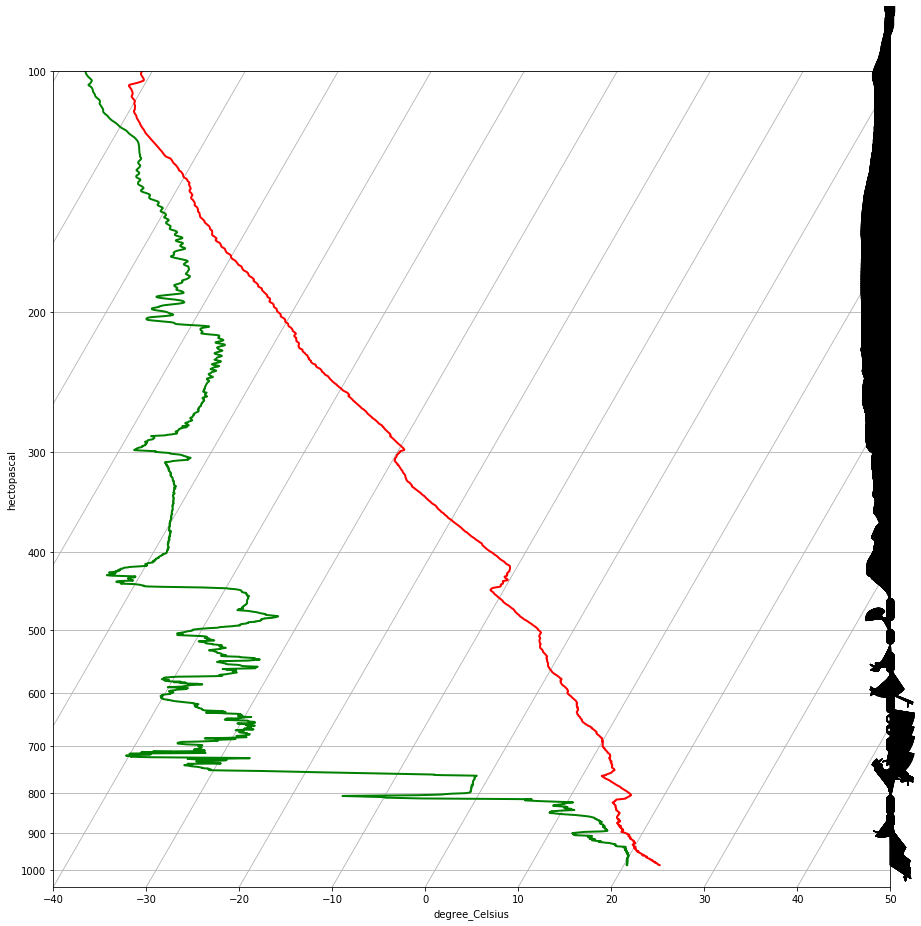

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [73]:
# Get some parameters for the Stereographic Projection
lon_0 = df.latitude.mean()
lat_0 = df.longitude.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


In [74]:
lon_0

12.744529724121094

In [75]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(df.longitude, df.latitude)
xi, yi = m(lon, lat)

ValueError: not enough values to unpack (expected 2, got 1)

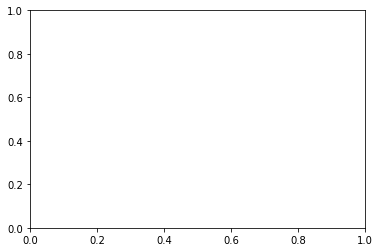

In [88]:
# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(df.temperature))
#cs = m.plot(xi,yi, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(temp_units)

# Add Title
plt.title('Temperature Profile')

plt.show()

In [ ]:
temp

In [ ]:
humidity

In [ ]:
temp_units

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


TypeError: __call__() takes from 3 to 4 positional arguments but 5525 were given

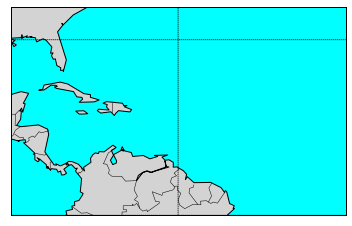

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

austin = (-97.75, 30.25)
hawaii = (-157.8, 21.3)
washington = (-77.01, 38.90)
chicago = (-87.68, 41.83)
losangeles = (-118.25, 34.05)

m = Basemap(projection = 'merc', llcrnrlat=0, urcrnrlat=35,
        llcrnrlon=-90, urcrnrlon=-30)

m.drawcoastlines()
m.fillcontinents (color='lightgray', lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

m.drawcountries()

x, y = m(*zip(*[df.latitude,df.longitude,df.temperature]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

plt.title('Mercator Projection')
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Robinson Projection")
plt.show()

In [ ]:
np.arange(-90.,91.,3.)